# Checkpoint 2 - Análise Covid Brasil

## Carregar módulos

In [ ]:
import numpy as np
import pandas as pd
import random as rd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Carregar dados

- Dados Covid Brasil

In [ ]:
! wget --no-check-certificate --content-disposition 'https://github.com/wcota/covid19br/blob/master/cases-brazil-cities-time.csv.gz?raw=true'

--2021-09-30 02:15:15--  https://github.com/wcota/covid19br/blob/master/cases-brazil-cities-time.csv.gz?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time.csv.gz [following]
--2021-09-30 02:15:15--  https://github.com/wcota/covid19br/raw/master/cases-brazil-cities-time.csv.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv.gz [following]
--2021-09-30 02:15:15--  https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [ ]:
! gunzip cases-brazil-cities-time.csv.gz

In [ ]:
dados_brasil = pd.read_csv('cases-brazil-cities-time.csv')

- Dados censo

In [ ]:
dados_censo = pd.read_csv('dados_municipios_2010.csv', sep = ';', decimal = ',', encoding = 'latin1')

## Ajustar dados

In [ ]:
max_date = max(dados_brasil['date'])

In [ ]:
dados_brasil = dados_brasil[(dados_brasil['date'] == max_date) & \
                            (dados_brasil['state'] != 'TOTAL')]

In [ ]:
dados_brasil

,epi_week,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,last_info_date
2831058,139,2021-09-29,Brazil,GO,Abadia de Goiás/GO,5200050,1,38,2,1898,414.93776,20725.04914,0.02002,MS,2021-09-29
2831059,139,2021-09-29,Brazil,MG,Abadia dos Dourados/MG,3100104,0,17,0,574,242.09627,8174.30931,0.02962,MS,2021-09-29
2831060,139,2021-09-29,Brazil,GO,Abadiânia/GO,5200100,0,43,1,513,206.00776,2457.72050,0.08382,MS,2021-09-29
2831061,139,2021-09-29,Brazil,PA,Abaetetuba/PA,1500107,0,225,0,9337,140.24022,5819.65732,0.02410,MS,2021-09-29
2831062,139,2021-09-29,Brazil,MG,Abaeté/MG,3100203,0,42,8,1657,180.54421,7122.89902,0.02535,MS,2021-09-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836649,139,2021-09-29,Brazil,RS,Áurea/RS,4301552,0,6,0,331,170.59994,9411.43020,0.01813,MS,2021-09-29
2836650,139,2021-09-29,Brazil,PR,Ângulo/PR,4101150,0,7,0,381,238.82634,12998.97646,0.01837,MS,2021-09-29
2836651,139,2021-09-29,Brazil,BA,Érico Cardoso/BA,2900504,0,4,0,329,38.04813,3129.45877,0.01216,MS,2021-09-29
2836652,139,2021-09-29,Brazil,PA,Óbidos/PA,1505106,0,134,0,6632,255.36943,12638.88095,0.02021,MS,2021-09-29


In [ ]:
cols = ['ibgeID', 'date', 'state', 'city', 'totalCases', 'deaths']

In [ ]:
dados_brasil = dados_brasil[cols].reset_index(drop=True)

## Aqui começa o trabalho

##1 – Realizar o join com o dataframe “dados_brasil” com o dataframe “dados_censo”.


In [ ]:
dados_brasil.head()

,ibgeID,date,state,city,totalCases,deaths
0,5200050,2021-09-29,GO,Abadia de Goiás/GO,1898,38
1,3100104,2021-09-29,MG,Abadia dos Dourados/MG,574,17
2,5200100,2021-09-29,GO,Abadiânia/GO,513,43
3,1500107,2021-09-29,PA,Abaetetuba/PA,9337,225
4,3100203,2021-09-29,MG,Abaeté/MG,1657,42


In [ ]:
dados_censo.head()

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM
0,1100015,ALTA FLORESTA D'OESTE,70.75,8.67,13.00,476.99,0.641
1,1100023,ARIQUEMES,73.36,9.18,8.53,689.95,0.702
2,1100031,CABIXI,70.39,10.09,14.73,457.17,0.650
3,1100049,CACOAL,74.27,9.74,8.94,738.06,0.718
4,1100056,CEREJEIRAS,72.94,10.22,11.17,577.18,0.692


In [ ]:
dados_covid = pd.merge(dados_censo, dados_brasil,
                       on = ['ibgeID'],
                       how = 'inner')

In [ ]:
dados_covid.head()

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM,date,state,city,totalCases,deaths
0,1100015,ALTA FLORESTA D'OESTE,70.75,8.67,13.00,476.99,0.641,2021-09-29,RO,Alta Floresta D'Oeste/RO,4085,66
1,1100023,ARIQUEMES,73.36,9.18,8.53,689.95,0.702,2021-09-29,RO,Ariquemes/RO,22656,497
2,1100031,CABIXI,70.39,10.09,14.73,457.17,0.650,2021-09-29,RO,Cabixi/RO,918,21
3,1100049,CACOAL,74.27,9.74,8.94,738.06,0.718,2021-09-29,RO,Cacoal/RO,14898,304
4,1100056,CEREJEIRAS,72.94,10.22,11.17,577.18,0.692,2021-09-29,RO,Cerejeiras/RO,2569,62


In [ ]:
dados_covid.shape

(5565, 12)

In [ ]:
dados_covid.describe

<bound method NDFrame.describe of        ibgeID              Municipio  ...  totalCases  deaths
0     1100015  ALTA FLORESTA D'OESTE  ...        4085      66
1     1100023              ARIQUEMES  ...       22656     497
2     1100031                 CABIXI  ...         918      21
3     1100049                 CACOAL  ...       14898     304
4     1100056             CEREJEIRAS  ...        2569      62
...       ...                    ...  ...         ...     ...
5560  5222005             VIANÓPOLIS  ...        1060      34
5561  5222054         VICENTINÓPOLIS  ...        1411      24
5562  5222203               VILA BOA  ...         216       4
5563  5222302          VILA PROPÍCIO  ...         414       7
5564  5300108               BRASÍLIA  ...      494299   10454

[5565 rows x 12 columns]>

##2 – Qual seria o tamanho de amostra para uma pesquisa em todos os municípios do Brasil contidos no dataframe? (Utilizar a variância da renda per capita como base da fórmula de amostragem, z = 1,96 e margem de erro = 20). 

In [ ]:
dados_piloto = dados_covid.agg(media_RDPC = pd.NamedAgg('RDPC', 'mean'),
                                   dp_RDPC = pd.NamedAgg('RDPC', 'std'),
                                   N = pd.NamedAgg('RDPC', 'count'))

In [ ]:
dados_piloto

,RDPC
media_RDPC,493.605617
dp_RDPC,243.269333
N,5565.000000


In [ ]:
def formula_amostra_continua(N, S, Z, ME):
  n = (Z**2 * S**2 * N) / ((ME**2 * (N-1)) + (Z**2 * S**2))
  return int(n)

In [ ]:
N = 5565
Z = 1.96
S = 243.269
ME = 20

In [ ]:
n_br = formula_amostra_continua(N,Z,S,ME)
n_br

515

##3 – Qual seria o tamanho da amostra para São Paulo? (Utilizar a variância da renda per capita como base da fórmula de amostragem, z = 1,96 e margem de erro = 20)


In [ ]:
dados_covid_sp = dados_covid[dados_covid['state'].isin(['SP'])]
dados_covid_sp

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM,date,state,city,totalCases,deaths
3266,3500105,ADAMANTINA,76.13,10.39,6.44,975.43,0.790,2021-09-29,SP,Adamantina/SP,3794,133
3267,3500204,ADOLFO,75.62,10.13,8.55,661.65,0.730,2021-09-29,SP,Adolfo/SP,621,19
3268,3500303,AGUAÍ,76.49,8.57,8.17,636.07,0.715,2021-09-29,SP,Aguaí/SP,3601,110
3269,3500402,ÁGUAS DA PRATA,78.13,9.40,6.40,853.39,0.781,2021-09-29,SP,Águas da Prata/SP,657,26
3270,3500501,ÁGUAS DE LINDÓIA,75.76,9.92,6.29,730.13,0.745,2021-09-29,SP,Águas de Lindóia/SP,2044,51
...,...,...,...,...,...,...,...,...,...,...,...,...
3906,3557006,VOTORANTIM,75.30,10.42,3.66,703.99,0.767,2021-09-29,SP,Votorantim/SP,11672,516
3907,3557105,VOTUPORANGA,76.44,11.17,5.43,977.39,0.790,2021-09-29,SP,Votuporanga/SP,16151,453
3908,3557154,ZACARIAS,74.56,12.12,9.30,605.79,0.729,2021-09-29,SP,Zacarias/SP,268,10
3909,3557204,CHAVANTES,74.66,10.75,9.38,677.30,0.729,2021-09-29,SP,Chavantes/SP,1390,48


In [ ]:
dados_piloto_sp = dados_covid_sp.agg(media_RDPC = pd.NamedAgg('RDPC', 'mean'),
                                   dp_RDPC = pd.NamedAgg('RDPC', 'std'),
                                   N = pd.NamedAgg('RDPC', 'count'))

In [ ]:
dados_piloto_sp

,RDPC
media_RDPC,713.926155
dp_RDPC,197.398270
N,645.000000


In [ ]:
N = 645
Z = 1.96
S = 197.398
ME = 20

In [ ]:
n_sp = formula_amostra_continua(N,Z,S,ME)
n_sp

237

##4 – Agora que possui os tamanhos de amostra para o Brasil (n_br) e para São Paulo (n_sp), criar um dataframe para a amostra do Brasil e outro dataframe para amostra de São Paulo. (utilizar o método da amostra aleatória simples)

In [ ]:
dados_amostra_simples_br = dados_covid.sample(n=n_br, random_state=1245)
dados_amostra_simples_br

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM,date,state,city,totalCases,deaths
1295,2504108,CARRAPATEIRA,70.91,9.14,30.55,214.54,0.603,2021-09-29,PB,Carrapateira/PB,441,6
5305,5108006,TAPURAH,74.88,9.35,5.51,789.61,0.714,2021-09-29,MT,Tapurah/MT,2658,32
1016,2309607,PACAJUS,72.30,9.91,19.66,354.78,0.659,2021-09-29,CE,Pacajus/CE,5963,122
4340,4202099,BARRA BONITA,74.79,11.28,14.64,594.28,0.701,2021-09-29,SC,Barra Bonita/SC,202,2
922,2302701,CAMPOS SALES,71.11,10.57,31.53,303.68,0.630,2021-09-29,CE,Campos Sales/CE,2533,40
...,...,...,...,...,...,...,...,...,...,...,...,...
2535,3126307,Fortaleza de Minas,73.31,7.69,9.63,562.53,0.670,2021-09-29,MG,Fortaleza de Minas/MG,300,7
2492,3122454,Divisópolis,73.10,9.61,27.89,290.45,0.609,2021-09-29,MG,Divisópolis/MG,495,7
4851,4312104,MATA,73.39,10.92,7.96,484.75,0.656,2021-09-29,RS,Mata/RS,495,12
824,2207959,NOVA SANTA RITA,71.17,9.11,31.53,202.99,0.554,2021-09-29,PI,Nova Santa Rita/PI,146,4


In [ ]:
dados_amostra_simples_sp = dados_covid_sp.sample(n=n_sp, random_state=1245)
dados_amostra_simples_sp

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM,date,state,city,totalCases,deaths
3542,3524303,JABOTICABAL,76.08,10.36,5.16,1015.51,0.778,2021-09-29,SP,Jaboticabal/SP,7436,117
3760,3544103,RIO GRANDE DA SERRA,74.36,11.40,5.73,563.57,0.749,2021-09-29,SP,Rio Grande da Serra/SP,2202,88
3278,3501103,ALTO ALEGRE,74.00,10.80,9.00,560.30,0.700,2021-09-29,SP,Alto Alegre/SP,401,21
3847,3552205,SOROCABA,75.59,10.59,3.24,1107.19,0.798,2021-09-29,SP,Sorocaba/SP,77057,2820
3473,3518305,GUARAREMA,74.03,10.67,7.65,748.79,0.731,2021-09-29,SP,Guararema/SP,2282,99
...,...,...,...,...,...,...,...,...,...,...,...,...
3674,3536307,PATROCÍNIO PAULISTA,74.55,10.03,7.19,607.51,0.730,2021-09-29,SP,Patrocínio Paulista/SP,1132,33
3396,3511508,CERQUILHO,76.21,10.64,3.72,894.52,0.782,2021-09-29,SP,Cerquilho/SP,6511,157
3526,3522703,ITÁPOLIS,75.14,10.06,7.33,787.75,0.744,2021-09-29,SP,Itápolis/SP,5725,164
3359,3508207,BURITIZAL,74.79,10.03,6.08,817.16,0.735,2021-09-29,SP,Buritizal/SP,352,10


##5 – Agora que possui os dataframes de Brasil (dados_amostra_br) e São Paulo (dados_amostra_sp), realizar as seguintes análises:

###a) Obter as medidas descritivas: média, desvio padrão, primeiro, segundo e terceiro quartil para o número de infectados.


- Brasil

In [ ]:
dados_amostra_simples_br['Quartil'] = pd.qcut(dados_amostra_simples_br['totalCases'], 4, labels = ['1', '2', '3', '4'])
dados_amostra_simples_br

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM,date,state,city,totalCases,deaths,Quartil
1295,2504108,CARRAPATEIRA,70.91,9.14,30.55,214.54,0.603,2021-09-29,PB,Carrapateira/PB,441,6,1
5305,5108006,TAPURAH,74.88,9.35,5.51,789.61,0.714,2021-09-29,MT,Tapurah/MT,2658,32,4
1016,2309607,PACAJUS,72.30,9.91,19.66,354.78,0.659,2021-09-29,CE,Pacajus/CE,5963,122,4
4340,4202099,BARRA BONITA,74.79,11.28,14.64,594.28,0.701,2021-09-29,SC,Barra Bonita/SC,202,2,1
922,2302701,CAMPOS SALES,71.11,10.57,31.53,303.68,0.630,2021-09-29,CE,Campos Sales/CE,2533,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,3126307,Fortaleza de Minas,73.31,7.69,9.63,562.53,0.670,2021-09-29,MG,Fortaleza de Minas/MG,300,7,1
2492,3122454,Divisópolis,73.10,9.61,27.89,290.45,0.609,2021-09-29,MG,Divisópolis/MG,495,7,2
4851,4312104,MATA,73.39,10.92,7.96,484.75,0.656,2021-09-29,RS,Mata/RS,495,12,2
824,2207959,NOVA SANTA RITA,71.17,9.11,31.53,202.99,0.554,2021-09-29,PI,Nova Santa Rita/PI,146,4,1


In [ ]:
dados_infectados_br = dados_amostra_simples_br.groupby('Quartil') \
                                     .agg(media_RDPC = pd.NamedAgg('RDPC', 'mean'),
                                          dp_RDPC = pd.NamedAgg('RDPC', 'std'),
                                          N = pd.NamedAgg('RDPC', 'count')) \
                                     .reset_index()
dados_infectados_br

,Quartil,media_RDPC,dp_RDPC,N
0,1,451.577829,207.624811,129
1,2,427.543566,237.636827,129
2,3,475.554297,209.187124,128
3,4,583.488992,258.882625,129


In [ ]:
dados_infectados_br['percent'] = dados_infectados_br['N'] / sum(dados_infectados_br['N'])

In [ ]:
dados_infectados_br

,Quartil,media_RDPC,dp_RDPC,N,percent
0,1,451.577829,207.624811,129,0.250485
1,2,427.543566,237.636827,129,0.250485
2,3,475.554297,209.187124,128,0.248544
3,4,583.488992,258.882625,129,0.250485


- São Paulo

In [ ]:
dados_amostra_simples_sp['Quartil'] = pd.qcut(dados_amostra_simples_sp['totalCases'], 4, labels = ['1', '2', '3', '4'])
dados_amostra_simples_sp

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM,date,state,city,totalCases,deaths,Quartil
3542,3524303,JABOTICABAL,76.08,10.36,5.16,1015.51,0.778,2021-09-29,SP,Jaboticabal/SP,7436,117,4
3760,3544103,RIO GRANDE DA SERRA,74.36,11.40,5.73,563.57,0.749,2021-09-29,SP,Rio Grande da Serra/SP,2202,88,3
3278,3501103,ALTO ALEGRE,74.00,10.80,9.00,560.30,0.700,2021-09-29,SP,Alto Alegre/SP,401,21,1
3847,3552205,SOROCABA,75.59,10.59,3.24,1107.19,0.798,2021-09-29,SP,Sorocaba/SP,77057,2820,4
3473,3518305,GUARAREMA,74.03,10.67,7.65,748.79,0.731,2021-09-29,SP,Guararema/SP,2282,99,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,3536307,PATROCÍNIO PAULISTA,74.55,10.03,7.19,607.51,0.730,2021-09-29,SP,Patrocínio Paulista/SP,1132,33,2
3396,3511508,CERQUILHO,76.21,10.64,3.72,894.52,0.782,2021-09-29,SP,Cerquilho/SP,6511,157,4
3526,3522703,ITÁPOLIS,75.14,10.06,7.33,787.75,0.744,2021-09-29,SP,Itápolis/SP,5725,164,4
3359,3508207,BURITIZAL,74.79,10.03,6.08,817.16,0.735,2021-09-29,SP,Buritizal/SP,352,10,1


In [ ]:
dados_infectados_sp = dados_amostra_simples_sp.groupby('Quartil') \
                                     .agg(media_RDPC = pd.NamedAgg('RDPC', 'mean'),
                                          dp_RDPC = pd.NamedAgg('RDPC', 'std'),
                                          N = pd.NamedAgg('RDPC', 'count')) \
                                     .reset_index()
dados_infectados_sp

,Quartil,media_RDPC,dp_RDPC,N
0,1,594.630667,118.107161,60
1,2,657.104576,130.671202,59
2,3,728.355254,156.126846,59
3,4,909.300678,237.935955,59


In [ ]:
dados_infectados_sp['Percent'] = dados_infectados_sp['N'] / sum(dados_infectados_sp['N'])

In [ ]:
dados_infectados_sp

,Quartil,media_RDPC,dp_RDPC,N,Percent
0,1,594.630667,118.107161,60,0.253165
1,2,657.104576,130.671202,59,0.248945
2,3,728.355254,156.126846,59,0.248945
3,4,909.300678,237.935955,59,0.248945


- b) Obter as medidas descritivas: média, desvio padrão, primeiro, segundo e terceiro quartil para o número de mortes.

- Brasil

In [ ]:
dados_amostra_simples_br['Quartil'] = pd.qcut(dados_amostra_simples_br['deaths'], 4, labels = ['1', '2', '3', '4'])
dados_amostra_simples_br

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM,date,state,city,totalCases,deaths,Quartil
1295,2504108,CARRAPATEIRA,70.91,9.14,30.55,214.54,0.603,2021-09-29,PB,Carrapateira/PB,441,6,1
5305,5108006,TAPURAH,74.88,9.35,5.51,789.61,0.714,2021-09-29,MT,Tapurah/MT,2658,32,3
1016,2309607,PACAJUS,72.30,9.91,19.66,354.78,0.659,2021-09-29,CE,Pacajus/CE,5963,122,4
4340,4202099,BARRA BONITA,74.79,11.28,14.64,594.28,0.701,2021-09-29,SC,Barra Bonita/SC,202,2,1
922,2302701,CAMPOS SALES,71.11,10.57,31.53,303.68,0.630,2021-09-29,CE,Campos Sales/CE,2533,40,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,3126307,Fortaleza de Minas,73.31,7.69,9.63,562.53,0.670,2021-09-29,MG,Fortaleza de Minas/MG,300,7,1
2492,3122454,Divisópolis,73.10,9.61,27.89,290.45,0.609,2021-09-29,MG,Divisópolis/MG,495,7,1
4851,4312104,MATA,73.39,10.92,7.96,484.75,0.656,2021-09-29,RS,Mata/RS,495,12,2
824,2207959,NOVA SANTA RITA,71.17,9.11,31.53,202.99,0.554,2021-09-29,PI,Nova Santa Rita/PI,146,4,1


In [ ]:
dados_mortes_br = dados_amostra_simples_br.groupby('Quartil') \
                                     .agg(media_RDPC = pd.NamedAgg('RDPC', 'mean'),
                                          dp_RDPC = pd.NamedAgg('RDPC', 'std'),
                                          N = pd.NamedAgg('RDPC', 'count')) \
                                     .reset_index()
dados_mortes_br

,Quartil,media_RDPC,dp_RDPC,N
0,1,433.174375,214.246620,144
1,2,452.352845,236.248373,116
2,3,447.119606,197.993535,127
3,4,608.698906,253.196746,128


In [ ]:
dados_mortes_br['percent'] = dados_mortes_br['N'] / sum(dados_mortes_br['N'])

In [ ]:
dados_mortes_br

,Quartil,media_RDPC,dp_RDPC,N,percent
0,1,433.174375,214.246620,144,0.279612
1,2,452.352845,236.248373,116,0.225243
2,3,447.119606,197.993535,127,0.246602
3,4,608.698906,253.196746,128,0.248544


- São Paulo

In [ ]:
dados_amostra_simples_sp['Quartil'] = pd.qcut(dados_amostra_simples_sp['deaths'], 4, labels = ['1', '2', '3', '4'])
dados_amostra_simples_sp

,ibgeID,Municipio,ESPVIDA,E_ANOSESTUDO,T_ANALF18M,RDPC,IDHM,date,state,city,totalCases,deaths,Quartil
3542,3524303,JABOTICABAL,76.08,10.36,5.16,1015.51,0.778,2021-09-29,SP,Jaboticabal/SP,7436,117,3
3760,3544103,RIO GRANDE DA SERRA,74.36,11.40,5.73,563.57,0.749,2021-09-29,SP,Rio Grande da Serra/SP,2202,88,3
3278,3501103,ALTO ALEGRE,74.00,10.80,9.00,560.30,0.700,2021-09-29,SP,Alto Alegre/SP,401,21,2
3847,3552205,SOROCABA,75.59,10.59,3.24,1107.19,0.798,2021-09-29,SP,Sorocaba/SP,77057,2820,4
3473,3518305,GUARAREMA,74.03,10.67,7.65,748.79,0.731,2021-09-29,SP,Guararema/SP,2282,99,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,3536307,PATROCÍNIO PAULISTA,74.55,10.03,7.19,607.51,0.730,2021-09-29,SP,Patrocínio Paulista/SP,1132,33,2
3396,3511508,CERQUILHO,76.21,10.64,3.72,894.52,0.782,2021-09-29,SP,Cerquilho/SP,6511,157,4
3526,3522703,ITÁPOLIS,75.14,10.06,7.33,787.75,0.744,2021-09-29,SP,Itápolis/SP,5725,164,4
3359,3508207,BURITIZAL,74.79,10.03,6.08,817.16,0.735,2021-09-29,SP,Buritizal/SP,352,10,1


In [ ]:
dados_mortes_sp = dados_amostra_simples_sp.groupby('Quartil') \
                                     .agg(media_RDPC = pd.NamedAgg('RDPC', 'mean'),
                                          dp_RDPC = pd.NamedAgg('RDPC', 'std'),
                                          N = pd.NamedAgg('RDPC', 'count')) \
                                     .reset_index()
dados_mortes_sp

,Quartil,media_RDPC,dp_RDPC,N
0,1,599.062833,144.224738,60
1,2,649.014667,115.228579,60
2,3,738.504483,152.545913,58
3,4,904.250847,237.291068,59


In [ ]:
dados_mortes_sp['percent'] = dados_mortes_sp['N'] / sum(dados_mortes_sp['N'])

In [ ]:
dados_mortes_sp

,Quartil,media_RDPC,dp_RDPC,N,percent
0,1,599.062833,144.224738,60,0.253165
1,2,649.014667,115.228579,60,0.253165
2,3,738.504483,152.545913,58,0.244726
3,4,904.250847,237.291068,59,0.248945


- c)Gerar um histograma para o número de infectados e mortes. O desenho do histograma é similar com alguma das distribuições apresentadas?

Text(0, 0.5, 'totalCases')

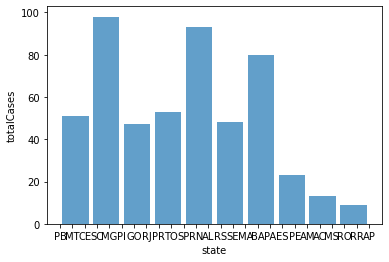

In [ ]:
plt.hist(dados_amostra_simples_br['state'], alpha=0.7, rwidth=0.85)
plt.xlabel('state')
plt.ylabel('totalCases')

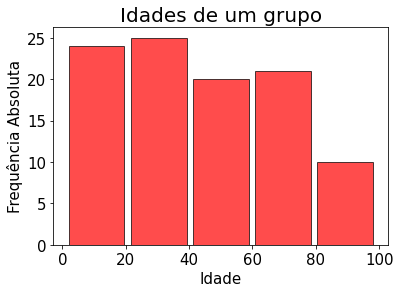

In [ ]:
idades=[65,26,67,50,47,73,1,58,2,94,12,22,12,95,25,13,61,41,24,95,
        3,71,53,24,23,44,83,30,19,32,71,66,45,6,99,4,76,27,50,18,58,                 61,53,72,14,78,36,89,6,71,58,69,22,34,38,51,71,83,22,22,36,44,        16,58,20,49,28,55,21,26,23,41,21,95,18,63,55,2,61,81,39,20,39,
17,66,60,73,26,54,16,76,83,9,12,15,35,54,11,7,61]
plt.title('Idades de um grupo', fontsize=20)
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.tick_params(labelsize=15)
plt.hist(idades, 5, rwidth=0.9, color='red', alpha=0.7, edgecolor='black')
plt.show()